In [1]:
import pandas as pd
import tensorflow 
import numpy as np
import matplotlib.pyplot as plt
import keras 
import os


In [4]:
!pip3 install -q keras


In [5]:
from __future__ import print_function
from keras.datasets import fashion_mnist
from keras.models import load_model
from matplotlib import cm
%matplotlib inline
import random



Verileri alalım

In [6]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print("X_train shape:", x_train.shape)
print(x_train.shape[0], "eğitim örnekleri")
print(x_test.shape[0], "test örnekleri")

print(x_train.shape, y_train.shape) # (60000, 28 ,28) (60000,) 
print(x_test.shape, y_test.shape) # (10000, 28 ,28) (10000,)



4422102/4422102 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28)
60000 eğitim örnekleri
10000 test örnekleri
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


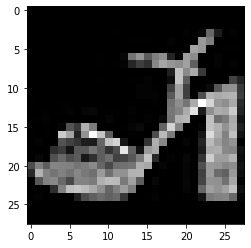

5


In [11]:
plt.imshow(x_test[3555], cmap="gray")
plt.show()
print(y_test[3555])

10 sınıftan oluşan fahion MNIST veri kümemiz var.

In [12]:
fashion_mnist_labels = np.array([
    'Tişört',
    'Pantolon',
    'Kazak',
    'Elibise',
    'Ceket',
    'Sandalet',
    'Gömlek',
    'Sneaker',
    'Çanta', 
    'Bisiklet Bot'
])

In [14]:
print(fashion_mnist_labels)

['Tişört' 'Pantolon' 'Kazak' 'Elibise' 'Ceket' 'Sandalet' 'Gömlek'
 'Sneaker' 'Çanta' 'Bisiklet Bot']


Daha önceden eğitilmiş modelimiz çkeceğiz burda


In [22]:
root = "/content/model_fashion-mnist_cnn_train2_epoch24.h5"
model = load_model(root)


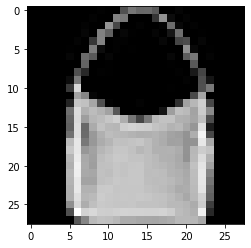

8
Çanta


In [47]:
resim = x_test[34]
plt.imshow(x_test[34], cmap="gray")
plt.show()
print(y_test[34])
print(fashion_mnist_labels[y_test[34]])

In [48]:
resim = resim.astype("float32")
resim /= 255  # basic normalization
resim = resim.reshape(1,28,28,1)

tahmin = model.predict(resim, batch_size=1)
print(tahmin)

bestclass1 = 0
bestnum = 0

bestclass2  = np.argmax(tahmin[0])

for n in [0,1,2,3,4,5,6,7,8,9]:
    if bestnum < tahmin[0][n]:
      bestnum = tahmin[0][n]
      bestclass1 = n

print(fashion_mnist_labels[bestclass1])
print(fashion_mnist_labels[bestclass2])



1/1 [==============================] - 0s 25ms/step
[[8.0086046e-08 2.7843244e-16 1.9499789e-10 1.5600218e-12 2.1400640e-11
  8.0258955e-09 2.4775071e-12 6.4278505e-10 9.9999988e-01 3.3245151e-16]]
Çanta
Çanta


In [49]:
print(np.argmax(tahmin[0]))

8


1/1 [==============================] - 0s 19ms/step


ValueError: ignored

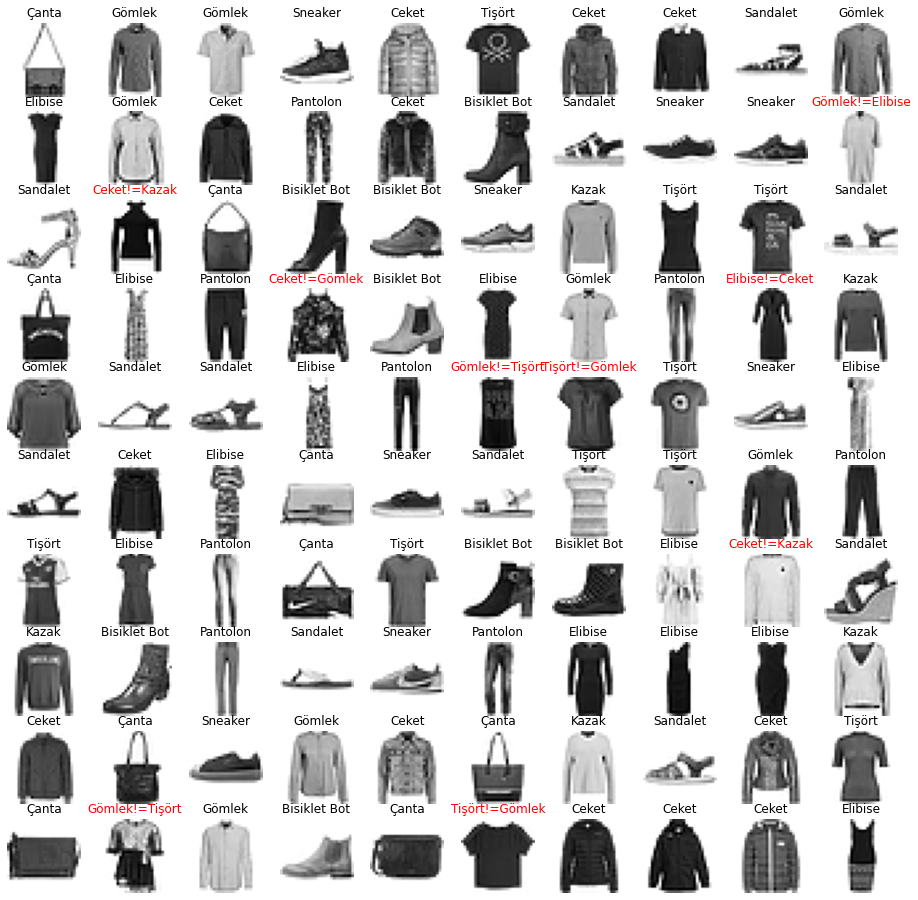

In [54]:
def convertMnistData(image):
  img = image.astype("float32")
  img /= 255
  return image.reshape(1,28,28,1)

plt.figure(figsize=(16,16))

right = 0
mistake = 0
prefictionNum = 200

for i in range(prefictionNum):
  index = random.randint(0, x_test.shape[0])
  image = x_test[index]
  data = convertMnistData(image)

  plt.subplot(10,10,i+1)
  plt.imshow(image,cmap = cm.gray_r)
  plt.axis("off")

  tahmin = model.predict(data, batch_size=1)

  
  bestclass = np.argmax(tahmin[0])

  

  if y_test[index] == bestclass:
    plt.title(fashion_mnist_labels[bestclass])  
    right += 1
  else:
    plt.title(fashion_mnist_labels[bestclass] + "!=" + fashion_mnist_labels[y_test[index]], color='#ff0000')
    mistake += 1


In [55]:
plt.show()

print("daoğru tahminlerin sayısı: ", right)
print("Hata sayısı: ", mistake)
print("doğru tahmin oranı: ", right/(mistake + right)*100, "%")


daoğru tahminlerin sayısı:  91
Hata sayısı:  9
doğru tahmin oranı:  91.0 %
